# Python basics 5: Xarray

This tutorial introduces xarray (pronounced _ex-array_), a Python library for working with labeled multidimensional arrays. It is widely used to handle Earth observation data, which often involves multiple dimensions &mdash; for instance longitude, latitude, time, and channels/bands. It can also display metadata such as the dataset Coordinate Reference System (CRS).

Accessing data held in an `xarray.DataArray` or `xarray.Dataset` is very similar to calling values from dictionaries.

> **Note:** This tutorial is about using xarray. An introduction to remote sensing datasets and more information on Earth observation products used on the Digital Earth Africa platform can be found in [Session 2: Digital Earth Africa products](https://training.digitalearthafrica.org/en/latest/session_2/01_products_intro.html).

Follow the instructions below to download the tutorial and open it in the Sandbox.

## Download the tutorial notebook

[Download the Python basics 5 tutorial notebook](../_static/python_basics/03_download_matplotlib.ipynb)

[Download the example image file](../_static/python_basics/

To view this notebook on the Sandbox, you will need to first download the notebook and the image to your computer, then upload both of them to the Sandbox. Follow these instructions:

1. Download the notebook by clicking the first link above. Download the image by clicking the second link above.
2. On the Sandbox, open the **Training** folder.
3. Click the **Upload Files** button as shown below.

<img align="middle" src="../_static/session_2/05_solution_uploadbutton.png" alt="Upload button." width=400>

4. Select the downloaded notebook using the file browser. Click **OK**.
5. Repeat to upload the image file to the **Training** folder. It may take a while for the upload to complete.
5. Both files will appear in the **Training** folder. Double-click the tutorial notebook to open it and begin the tutorial.

You can now use the tutorial notebook as an interactive version of this webpage. 

## Introduction to xarray

Xarray makes datasets easier to interpret when performing data analysis. To demonstrate this, we can start by opening a NetCDF file ( file suffix `.nc`) of the area of Guinea-Bissau we used in the previous [matplotlib lesson](./03_matplotlib.ipynb). 

In that lesson, we plotted the `.JPG` version of the image using `imread` and `imshow`.

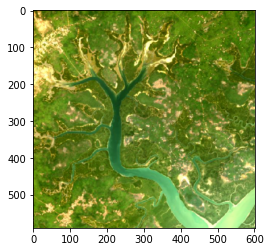

In [1]:
# Review of Python basics lesson 3: matplotlib

%matplotlib inline 

import numpy as np
from matplotlib import pyplot as plt

im = np.copy(plt.imread('Guinea_Bissau.JPG'))
plt.imshow(im)

Using xarray, we will now read in the `.nc` version of this image. NetCDF files are a filetype used for storing scientific array-oriented data. We could also load the `.JPG` using xarray, but the NetCDF file contains more metadata. 

As usual, we will first import the xarray package.

In [2]:
# Import the xarray package as xr

import xarray as xr

In [23]:
# Use xarray to open the image file

guinea_bissau = xr.open_dataset('guinea_bissau.nc')

In [32]:
# Inspect the xarray.DataSet by 
# typing its name

guinea_bissau

<xarray.Dataset>
Dimensions:      (x: 500, y: 501)
Coordinates:
    time         datetime64[ns] ...
  * y            (y) float64 1.338e+06 1.338e+06 ... 1.323e+06 1.323e+06
  * x            (x) float64 3.88e+05 3.880e+05 3.881e+05 ... 4.03e+05 4.03e+05
    spatial_ref  int32 ...
Data variables:
    red          (y, x) float64 ...
    green        (y, x) float64 ...
    blue         (y, x) float64 ...
Attributes:
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

Let's inspect the data. This image (our dataset) has a height `y` of 501 pixels and a width `x` of 500 pixels. It has 3 `variables`, which correspond to the red, green, and blue bands needed to plot a colour image. Each of these bands has a value at each of the pixels, so we have a total of 751500 values (the result of 501 x 500 x 3). Each of the `x` and `y` values are associated with a longitude and latitude; the longitude and latitude values are stored under the `Coordinates` section.

The `xarray.DataSet` uses numpy arrays in the backend. What we see above is functionally similar to a bunch of numpy arrays holding the image band measurements and the longitude/latitude coordinates, combined with a dictionary of key-value pairs that defines the `Attributes` such as CRS and resolution (`res`). That sounds more complicated, doesn't it? Accessing these arrays through `xarray` avoids the complications of managing uncorrelated numpy arrays by themselves, and intuitively reads in geospatial data in a user-friendly manner. 

<img src="../_static/python_basics/dataset-diagram.png" alt="Xarray dataset breakdown" width="600" align="left"/>

_A visualisation of an `xarray.Dataset`. The coordinates are each a single dimension; `latitude`, `longitude` and `time`. Each `variable` (in this case `temperature` and `precipitation`) holds one value at each of the three coordinate dimensions._

An `xarray.Dataset` can be seen as a dictionary structure packing up the data, dimensions and attributes all linked together.

As in the NetCDF we loaded above, Digital Earth Africa follows the convention of storing spectral bands as separate variables, with each one as 3-dimensional cubes containing the temporal dimension.

To access a single variable we can use the same format as if it were a Python dictionary.

```python
var = dataset_name['variable_name']
```


Alternatively, we can use the `.` notation.

```python
var = dataset_name.variable_name
```

A single variable pulled from an `xarray.Dataset` is known as an `xarray.DataArray`. In the visualisation image above, the example `xarray.Dataset` is formed out of two `xarray.DataArray`s &mdash; one each for `temperature` and `precipitation`.

> **Note:** Variable names are often strings (enclosed in quotation marks). This is true of most Digital Earth Africa datasets, where variables such as satellite bands have names such as `'red'`, `'green'`, `'nir`'. Do not forget the quotation marks in first call method above, or the data will not load.

We will now pull just the `'red'` variable data from our `guinea_bissau` `xarray.Dataset`, and then plot it.

In [38]:
guinea_bissau['red']

# This is equivalent to
# guinea_bissau.red
# Try it!

<xarray.DataArray 'red' (y: 501, x: 500)>
array([[1007., 1007., 1069., ...,  489.,  476.,  422.],
       [ 988.,  991., 1048., ...,  456.,  459.,  444.],
       [ 976., 1023., 1062., ...,  453.,  454.,  448.],
       ...,
       [ 518.,  518.,  546., ...,  551.,  577.,  553.],
       [ 517.,  527.,  523., ...,  530.,  572.,  570.],
       [ 502.,  490.,  473., ...,  545.,  576.,  580.]])
Coordinates:
    time         datetime64[ns] 2018-01-09T11:22:11.054208
  * y            (y) float64 1.338e+06 1.338e+06 ... 1.323e+06 1.323e+06
  * x            (x) float64 3.88e+05 3.880e+05 3.881e+05 ... 4.03e+05 4.03e+05
    spatial_ref  int32 32628
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

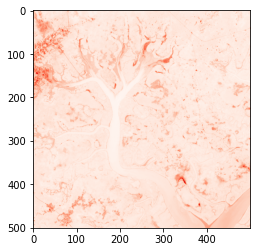

In [43]:
# Plot using imshow

plt.imshow(guinea_bissau['red'], cmap='Reds')

> **Note:** `cmap` stands for 'colour map'. What happens if you remove this argument? `plt.imshow` will then plot all the `red` data values in the default colour scheme, which is a purple-to-yellow sequential colourmap known as `viridis`. This is because matplotlib does not know the variable name `red` is associated with the colour red &mdash; it is just a name. You can find out more about matplotlib colourmaps through this [matplotlib tutorial](https://matplotlib.org/tutorials/colors/colormaps.html).

We stated above that _xarray uses numpy arrays in the backend_. You can access these numpy arrays by adding `.values` after a `DataArray` name. In the example below, `guinea_bissau.red` is the `DataArray` name.

In [63]:
guinea_bissau.red.values

array([[1007., 1007., 1069., ...,  489.,  476.,  422.],
       [ 988.,  991., 1048., ...,  456.,  459.,  444.],
       [ 976., 1023., 1062., ...,  453.,  454.,  448.],
       ...,
       [ 518.,  518.,  546., ...,  551.,  577.,  553.],
       [ 517.,  527.,  523., ...,  530.,  572.,  570.],
       [ 502.,  490.,  473., ...,  545.,  576.,  580.]])

It is possible to index `xarray.DataArray`s by position using the numpy `[:,:]` syntax we introduced in previous lessons, without converting to numpy arrays. However, we can also use the xarray syntax, which explictly labels coordinates instead of relying on knowing the order of dimensions.

Each method is demonstrated below.

* `[:,:]`: numpy syntax &mdash; requires knowing order of dimensions and positional indexes
* `isel(coordinate_name = coordinate_index)`: index selection &mdash; xarray syntax for selecting data based on its positional index (similar to numpy)
* `sel(coordinate_name = coordinate_value)`: value selection &mdash; xarray syntax for selecting data based on its value in that dimension

For example, for selecting the value of `green` in the top leftmost pixel:

In [64]:
# Using numpy syntax

guinea_bissau.green[0,0]

<xarray.DataArray 'green' ()>
array(730.)
Coordinates:
    time         datetime64[ns] 2018-01-09T11:22:11.054208
    y            float64 1.338e+06
    x            float64 3.88e+05
    spatial_ref  int32 32628
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

In this case our positional indexes for `x` and `y` are the same, but it is important to note `y` is the first dimension, and `x` is the second. This is not immediately obvious and can cause confusion. For this reason, it is recommended to use one of the xarray syntaxes shown below. They explicitly call on the dimension names.

In [54]:
# Using index selection, isel()

guinea_bissau.green.isel(y=0, x=0)

<xarray.DataArray 'green' ()>
array(730.)
Coordinates:
    time         datetime64[ns] 2018-01-09T11:22:11.054208
    y            float64 1.338e+06
    x            float64 3.88e+05
    spatial_ref  int32 32628
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

The measurement for `green` in the top leftmost pixel is `730`. In this example, the _values_ of `x` and `y` are latitude and longitude values, but their _positional indexes_ are `0`. We can call out the value by using the index, as shown below.

> **Note:** The CRS we are using has units of metres. This means the `x` and `y` values are measured in metres.

In [68]:
# The value of x at the pixel located at index (0,0)

guinea_bissau.green.x[0].values

array(388020.)

In [69]:
# The value of y at the pixel located at index (0,0)

guinea_bissau.green.y[0].values

array(1338000.)

How about the second method, `sel()`? This method was not available in the numpy arrays we used in previous lessons, and is one of the strengths of xarray as you can use the value of the dimension without knowing its positional index.

If we are given `(y, x) = (1338000, 388020)`, we can find the `green` measurement at that point.

In [67]:
guinea_bissau.green.sel(y=1338000, x=388020)

<xarray.DataArray 'green' ()>
array(730.)
Coordinates:
    time         datetime64[ns] 2018-01-09T11:22:11.054208
    y            float64 1.338e+06
    x            float64 3.88e+05
    spatial_ref  int32 32628
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

Finally, we can select ranges of `DataArray`s with the xarray syntaxes using `slice`. The three cells below all extract the same extent from the `guinea_bissau.green` `DataArray`.

The syntax for `slice` is:

```python
dataarray_name.isel(dimension_name = slice(index_start, index_end))

dataarray_name.sel(dimension_name = slice(value_start, value_end))
```

As before, it is easier to call upon the dimensions by name rather than using the implicit numpy square bracket syntax.

In [70]:
# Numpy syntax - dimensions are not named

guinea_bissau.green[:250, :250]

<xarray.DataArray 'green' (y: 250, x: 250)>
array([[730., 737., 811., ..., 493., 514., 539.],
       [729., 717., 773., ..., 512., 532., 534.],
       [714., 738., 764., ..., 528., 541., 521.],
       ...,
       [662., 665., 676., ..., 506., 510., 480.],
       [667., 669., 664., ..., 553., 502., 501.],
       [662., 661., 676., ..., 600., 575., 560.]])
Coordinates:
    time         datetime64[ns] 2018-01-09T11:22:11.054208
  * y            (y) float64 1.338e+06 1.338e+06 ... 1.331e+06 1.331e+06
  * x            (x) float64 3.88e+05 3.880e+05 ... 3.955e+05 3.955e+05
    spatial_ref  int32 32628
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

In [71]:
# Index selection slice

guinea_bissau.green.isel(x=slice(0,250), y=slice(0,250))

<xarray.DataArray 'green' (y: 250, x: 250)>
array([[730., 737., 811., ..., 493., 514., 539.],
       [729., 717., 773., ..., 512., 532., 534.],
       [714., 738., 764., ..., 528., 541., 521.],
       ...,
       [662., 665., 676., ..., 506., 510., 480.],
       [667., 669., 664., ..., 553., 502., 501.],
       [662., 661., 676., ..., 600., 575., 560.]])
Coordinates:
    time         datetime64[ns] 2018-01-09T11:22:11.054208
  * y            (y) float64 1.338e+06 1.338e+06 ... 1.331e+06 1.331e+06
  * x            (x) float64 3.88e+05 3.880e+05 ... 3.955e+05 3.955e+05
    spatial_ref  int32 32628
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

In [81]:
# Value selection slice

guinea_bissau.green.sel(x=slice(388020,395500), y=slice(1338000,1330530))

<xarray.DataArray 'green' (y: 250, x: 250)>
array([[730., 737., 811., ..., 493., 514., 539.],
       [729., 717., 773., ..., 512., 532., 534.],
       [714., 738., 764., ..., 528., 541., 521.],
       ...,
       [662., 665., 676., ..., 506., 510., 480.],
       [667., 669., 664., ..., 553., 502., 501.],
       [662., 661., 676., ..., 600., 575., 560.]])
Coordinates:
    time         datetime64[ns] 2018-01-09T11:22:11.054208
  * y            (y) float64 1.338e+06 1.338e+06 ... 1.331e+06 1.331e+06
  * x            (x) float64 3.88e+05 3.880e+05 ... 3.955e+05 3.955e+05
    spatial_ref  int32 32628
Attributes:
    units:         reflectance
    nodata:        -9999
    crs:           EPSG:32628
    grid_mapping:  spatial_ref

We can plot one of these selections using `plt.imshow`. This is good to check it is showing the top left section of the image as expected.

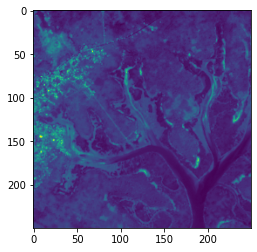

In [84]:
plt.imshow(guinea_bissau.green.sel(x=slice(388020,395500), y=slice(1338000,1330530)))

>**Note:** Plotting true-colour (RGB) images is first introduced in [Session 2: Loading data in the Sandbox](https://training.digitalearthafrica.org/en/latest/session_2/04_load_data_exercise.html). 

## Exercises

## Conclusion

Xarray is an important tool when dealing with Earth observation data in Python. Its flexible and intuitive interface allows multiple methods of selecting data and performing analysis.